<a href="https://colab.research.google.com/github/pedro048/Machine-Learning-with-python/blob/master/Projeto%20-%20Regress%C3%A3o%20Linear%20-%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import seaborn as sns
from sklearn.metrics import accuracy_score

wine = pd.read_csv('/content/winequality-red.csv')

# **Aprendizado supervisionado - Regressão​ Linear**
# Previsão da qualidade de novos vinhos

In [0]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Treinamento do método**

In [0]:
# separando as features do dataset
wine_data = []
wine_data = wine.drop(["quality"], axis=1)
# separando o target do dataset
wine_target = []
wine_target = wine["quality"]
# divide os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(wine_data, wine_target, test_size=0.2, random_state=6)
# Criando um objeto de regressão linear
linreg = LinearRegression()
# Treinamento usando X e y
linreg.fit(X_train, y_train)
print("O conjunto de dados possui {} instancias\n {} instancias de treino x\n {} instancias de teste x".
      format(wine_data.shape[0],
             X_train.shape[0],X_test.shape[0]))

O conjunto de dados possui 1599 instancias
 1279 instancias de treino x
 320 instancias de teste x


**Predição com dados de teste**

In [0]:
# Obtendo predição com o primeiro valor dos dados de teste
# he oferecida as features de um vinho e esperado a qualidade dele

pred = linreg.predict(X_test.values[0].reshape(1,-1))

print("Para o primeiro valor no array de testes:")
print("-> Valor estimado %.2f." % pred)
print("-> Valor real é %.2f." % y_test.values[0])


Para o primeiro valor no array de testes:
-> Valor estimado 6.57.
-> Valor real é 6.00.


In [0]:
# sao oferecidas as features de varios vinhos (dados de teste) e esperado a qualidade deles

pred_all = linreg.predict(X_test.values)

print("Usando os dados de teste:")
print("\n")
print("-> Valores estimados: ", pred_all)
print("\n")
print("-> Valores reais são: ", y_test.values)


Usando os dados de teste:


-> Valores estimados:  [6.56750484 6.30282214 6.0850561  5.33295214 5.84776693 5.44343127
 5.27336812 5.48966779 5.26731159 5.521926   5.68925176 5.53706539
 5.27808968 6.11910221 5.07628675 5.00958272 6.17527343 5.04625621
 5.02905071 5.13236492 6.47603035 5.52988113 5.66163473 5.05762696
 5.93066078 5.49483434 6.10863318 5.50460245 6.18480619 5.35623894
 5.6924942  5.57148797 5.48373302 5.88551295 6.40521136 5.48849576
 5.34494033 4.88646068 5.11146617 5.71966005 5.05355634 5.04967534
 6.52972751 5.94980583 6.20312599 5.89558441 6.14965904 5.75640368
 5.53790397 5.90103779 5.71063845 5.69815355 6.0877054  5.84486101
 4.78374363 5.67608905 4.97733112 5.72776577 5.06018625 6.2934001
 5.71006705 5.40395121 5.60839398 5.65772698 5.87170031 5.93417335
 4.85308304 5.14617507 6.60666661 5.00943401 6.30164261 5.42480236
 6.58034696 5.46231014 5.58667574 5.90261352 5.66526838 5.12828341
 5.29689158 6.38421008 5.88551295 6.49199354 6.43918052 5.34266405
 5.31238412 

**Analise de desempenho do algoritmo (inclui o erro quadratico medio)**

In [0]:
# Imprimindo os coeficientes de cada feature estimados para a regressão da diabetes
print('Coeficientes: ', linreg.coef_)
# e a constante associada
print('Constante: ', linreg.intercept_)

# Obtendo previsões para todo o conjunto de testes
y_pred = linreg.predict(X_test)

# Cálculo do Erro quadrático médio (MSE)
print("Erro quadrático médio: %.2f"
      % np.mean((y_pred - y_test) ** 2))
# Cálculo da variância
print('Variância: %.2f' % linreg.score(X_test, y_test))

Coeficientes:  [ 2.67337113e-02 -1.03510444e+00 -1.03316064e-01  1.92141152e-02
 -1.95664066e+00  3.43621329e-03 -2.71091167e-03 -2.15271151e+01
 -2.74017485e-01  9.47888615e-01  2.67049683e-01]
Constante:  25.14095770311193
Erro quadrático médio: 0.38
Variância: 0.39


**Analise de correlacao**

Mapa de correlacao (heatmap):




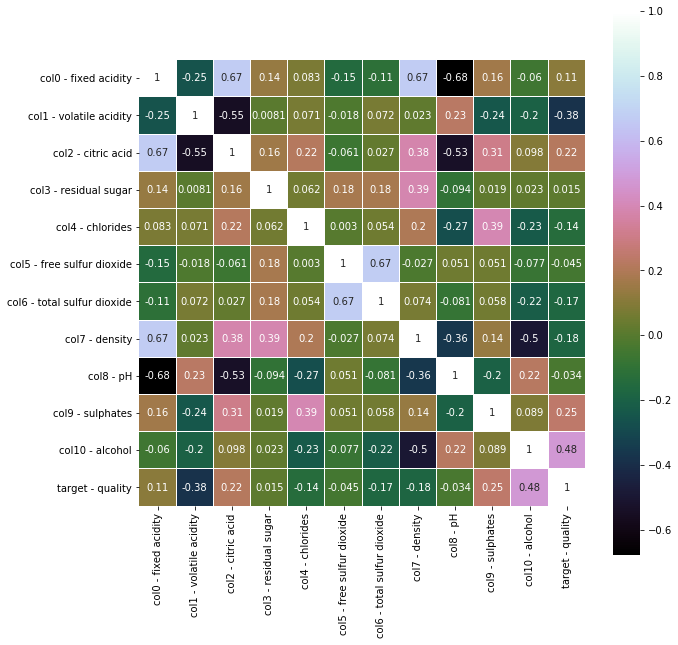



Ordem decrescente de correlacao: 




target - quality               1.000000
col10 - alcohol                0.476911
col9 - sulphates               0.246422
col2 - citric acid             0.219573
col0 - fixed acidity           0.112463
col3 - residual sugar          0.014881
col8 - pH                     -0.033764
col5 - free sulfur dioxide    -0.044529
col4 - chlorides              -0.135594
col6 - total sulfur dioxide   -0.167427
col7 - density                -0.176390
col1 - volatile acidity       -0.377707
Name: target - quality, dtype: float64

In [0]:
'''
Mapa que mostra o quanto as features se relacionam com o target. 
A relacao pode ser de forma positiva, negativa ou nula
'''
print("Mapa de correlacao (heatmap):")
print("\n")
colNames = ['col0 - fixed acidity', 'col1 - volatile acidity', 'col2 - citric acid', 'col3 - residual sugar', 'col4 - chlorides', 'col5 - free sulfur dioxide', 'col6 - total sulfur dioxide', 'col7 - density', 'col8 - pH', 'col9 - sulphates', 'col10 - alcohol', 'target - quality']

dfData = pd.DataFrame(X_train)
dfTarget = pd.DataFrame(y_train)

dfWine = pd.concat([dfData, dfTarget], axis=1)
dfWine.columns = colNames

plt.figure(figsize=(10,10))
sns.heatmap(dfWine.corr(), linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True, cmap='cubehelix')
plt.show()

#Ordenando as correlações
print("\n")
print("Ordem decrescente de correlacao: ")
print("\n")
dfWine.corr()["target - quality"].sort_values(ascending=False)


# **Aprendizado supervisionado - KNN (K-Nearest Neighbors)**
# Classificação dos vinhos analisados 

**Gerar o target para classificação**

In [0]:
'''
Classes de vinhos (separadas por qualidade):

0 - ruins
1 - bons
'''
# Gera um novo target, que a divisao da qualidade em classes (bom e ruim)
wine_target_class = (wine_target > 5).astype(int)

print("Features:")
print(wine_data.head())
print("\n")
print("Target (classes de qualidade):")
print(wine_target_class.head())
print("\n")

Features:
   fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0            7.4              0.70         0.00  ...  3.51       0.56      9.4
1            7.8              0.88         0.00  ...  3.20       0.68      9.8
2            7.8              0.76         0.04  ...  3.26       0.65      9.8
3           11.2              0.28         0.56  ...  3.16       0.58      9.8
4            7.4              0.70         0.00  ...  3.51       0.56      9.4

[5 rows x 11 columns]


Target (classes de qualidade):
0    0
1    0
2    0
3    1
4    0
Name: quality, dtype: int64




**Separa os dados de teste e treino**

In [0]:
X = wine_data
y = wine_target_class

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

**Instanciando o classificador KNN**

In [0]:
k = 25
knn = neighbors.KNeighborsClassifier(n_neighbors=k)

**Treinamento**

In [0]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

**Predicao**

In [0]:
pred_y = knn.predict(X_test)

# Observe a predição com o resultado real
print("Predicao: ", pred_y)
print("\n")
print("Valores reais: ", y_test.values)
print("\n")
print(pred_y == y_test.values)

Predicao:  [0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0
 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1
 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1
 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1
 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1]


Valores reais:  [0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0
 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 1
 1 0 1 0 1 1 1 1 0 0 

**Análise da acurácia**

In [0]:
print("Acuracia do metodo: ", knn.score(X_test, y_test))

Acuracia do metodo:  0.696875


**Tentativa de determinar qual número k de vizinhos nos dá os melhores resultados para esse problema**

In [0]:
from sklearn.model_selection import cross_val_score

knn = neighbors.KNeighborsClassifier(n_neighbors=25)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[0.575      0.8375     0.7375     0.58125    0.68125    0.725
 0.625      0.61875    0.65625    0.59119497]
0.6628694968553459


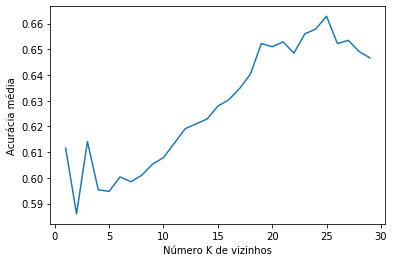

In [0]:
# Criamos uma lista com todos os valores de 1 a 29 (inclusivo)
k_opt = list(range(1, 30))
scores = []
# Para cada valor de k, adicionamos sua acurácia média a uma lista
for k in k_opt:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

# e visualizamos
plt.plot(k_opt, scores)
plt.xlabel('Número K de vizinhos')
plt.ylabel('Acurácia média')
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV

# Vamos testar novamenente todos esses valores de k
k_opt = list(range(1, 30))
# Mas variando também a opção 'weights', que nos diz se devemos considerar
# a distância dos k vizinhos mais próximos como pesos numa média ponderada ou não
weight_opt = ['uniform', 'distance']

# inserimos essas opções num dicionário com o seguinte formato
param_grid = dict(n_neighbors=k_opt, weights=weight_opt)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']}


In [0]:
# Instanciamos nosso estimador (os parâmetros não importam)
knn = neighbors.KNeighborsClassifier()

# Criamos o GridSearchCV, passando ao menos 
# o estimador e o dicionário de parâmetros
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Agora passamos nossos dados, e aqui ocorre todo
# e treinamento e teste da grid
grid.fit(X, y)

# Podemos então obter uma configuração de
# parâmetros que obteve score ótimo:
print(grid.best_params_)

{'n_neighbors': 25, 'weights': 'uniform'}
